# Using Python and CAS for Grand Slam Predictive Machine Learning

## 1. Import Libraries

In [2]:
import swat
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True

## 2. Connect to CAS

In [8]:
import json

# Gather credentials
def load_cred():
    with open('credentials.json') as cred_data:
        info = json.load(cred_data)
        username = info['USER_ID']
        pw = info['PASSWORD']
        
    return username, pw

username, pw = load_cred()

# CAS(hostname,port,username,password)
conn = swat.CAS("eecucs05.unx.sas.com", 5570, username, pw)

In [9]:
conn.session.listSessions()

,SessionName,UUID,State,Authentication,Userid
0,Session:Tue Jun 18 16:56:31 2019,11afa7a4-33cd-ba47-ab1a-54df7c7a3281,Connected,OAuth,edbras
1,dataExplorer:Tue Jun 18 20:27:26 2019,12e5384a-f042-434d-85f7-7a1db30df591,Connected,OAuth,edbras
2,SAS Environment Manager:Tue Jun 18 20:27:26 2019,cba61d9e-23a2-fa46-95dc-101be57f460c,Connected,OAuth,edbras
3,Session:Tue Jun 18 20:27:39 2019,039c48aa-e200-334c-b80f-121768ed9efa,Connected,OAuth,edbras
4,py-session-1:Tue Jun 18 20:31:12 2019,52a84927-96a5-6742-a1a1-bb30bbd8a9a1,Connected,OAuth/External PAM,edbras
5,py-session-2:Tue Jun 18 20:34:56 2019,2124e288-64fe-d042-b47b-a76bccf2f0dc,Connected,OAuth/External PAM,edbras


## 3. Load Data

In [10]:
tourn_list = ['A2017','F2017','W2017', 'U2017','A2018','F2018','W2018','U2018','A2019','F2019']
df_list = []

for f in tourn_list:
    df_list.append(pd.read_excel('./data/data_'+f+'.xls', header = 0, index_col = 0))

df_train = pd.concat(df_list, ignore_index = True)

In [12]:
# Upload Data Frame to CAS and create CASTable object reference
castbl = conn.upload_frame(df_train, casout = dict(name = 'df_tennis', replace = True))

# Variable for CASTable object data name
indata = 'df_tennis'

NOTE: Cloud Analytic Services made the uploaded file available as table DF_TENNIS in caslib CASUSERHDFS(edbras).
NOTE: The table DF_TENNIS has been created in caslib CASUSERHDFS(edbras) from binary data uploaded to Cloud Analytic Services.


## 4. Quick Exploration

In [44]:
display(castbl.head())

,Player,P Full,P Rank,P Points,P H2H,P Fav Surface,P Titles,P Best Rank,P Best Date,P ELO Rank,P ELO Points,P Seasons,P Backhand,P Handed,Player Win,Round,Tournament,Court
0,A Murray,Andy Murray,258.0,200.0,2.0,Grass 31%,45.0,1.0,07-11-2016,4.0,2270.0,14.0,Two-handed,Right-handed,1.0,r1,AUS,H
1,I Marchenko,Illya Marchenko,NaN,NaN,0.0,Hard 47%,NaN,49.0,26-09-2016,NaN,NaN,10.0,Two-handed,Right-handed,0.0,r1,AUS,H
2,A Rublev,Andrey Rublev,68.0,760.0,1.0,Grass 25%,1.0,31.0,19-02-2018,63.0,1879.0,5.0,Two-handed,Right-handed,1.0,r1,AUS,H
3,Y-h Lu,Yen Hsun Lu,NaN,NaN,1.0,"Fast (H, G) 36%",NaN,33.0,01-11-2010,NaN,NaN,16.0,Two-handed,Right-handed,0.0,r1,AUS,H
4,A De Minaur,Alex De Minaur,31.0,1298.0,1.0,Hard 28%,NaN,31.0,15-10-2018,44.0,1925.0,2.0,Two-handed,Right-handed,1.0,r1,AUS,H


In [43]:
castbl.shape

(2540, 18)

In [ ]:
conn.loadActionSet('simple')
actions = conn.builtins.help(actionSet = 'simple')

In [ ]:
col_list = list(castbl.columns)
# col_list = [e for e in col_list if e not in 
#                   ['Player','P Full', 'P Rank', 'P Seasons','P ELO Points',
#                    'P Points', 'P ELO Rank', 'P Best Date', 'P Best Rank', 'P Titles', 'P H2H', 'P Fav Surface']
#            ]
display(col_list)

In [40]:
col_list = ['P Backhand','P Handed','Player Win','Round','Tournament','Court']

conn.simple.freq(
    table = indata,
    inputs = col_list
)

,Column,NumVar,CharVar,FmtVar,Level,Frequency
0,P Backhand,NaN,,,1,11.0
1,P Backhand,NaN,One-handed,One-handed,2,460.0
2,P Backhand,NaN,Two-handed,Two-handed,3,2069.0
3,P Handed,NaN,,,1,66.0
4,P Handed,NaN,Left-handed,Left-handed,2,367.0
5,P Handed,NaN,Right-handed,Right-handed,3,2107.0
6,Player Win,0.0,,0,1,1270.0
7,Player Win,1.0,,1,2,1270.0
8,Round,NaN,r1,r1,1,1280.0
9,Round,NaN,r2,r2,2,640.0


## 5. Use Pre-existing Python code to prepare data for modeling

I'm using these libraries for purposes of time and consistency. Alternatively, use the dataPreprocess action set for imputation.

Actions performed by data_prep_func (code on [Github](https://github.com/edbrasil/tennis_machine_learning/blob/master/data_prep.py)):

 - Impute missing values
 - Extract year from P Best Date
 - Add a Match_ID
 - Group by Match_ID and pivot
 - Drop columns made redundant by match_id pivot
 - If stats are gathered post-tournament, then remove 1 from the winning player's head-to-head
 - Create dummy variables
 - Split explanatory variables from target
 - Standardize variables on a 0 to 1 scale

In [48]:
from data_prep import data_prep_func

In [46]:
X_train, y_train = data_prep_func(df_train, full_data=True, drop_extra = True)

In [49]:
print(X_train.head(2))
print(y_train.head(2))

   P Rank_0  P Rank_1  P Points_0  P Points_1   P H2H_0   P H2H_1  P Titles_0  \
0  0.515030       1.0    0.015729         0.0  0.037037  0.037037    0.445545   
1  0.134269       1.0    0.059772         0.0  0.000000  0.074074    0.009901   

   P Titles_1  P Best Rank_0  P Best Rank_1  ...  P Fav Surface_1_Fast  \
0         0.0        0.00000       0.144144  ...                   0.0   
1         0.0        0.03003       0.096096  ...                   1.0   

   P Fav Surface_1_Grass  P Fav Surface_1_Hard  P Fav Surface_1_None  \
0                    0.0                   1.0                   0.0   
1                    0.0                   0.0                   0.0   

   P Fav Surface_1_Slow  P Fav Surface_1_Soft  P Backhand_0_Two-handed  \
0                   0.0                   0.0                      1.0   
1                   0.0                   0.0                      1.0   

   P Backhand_1_Two-handed  P Handed_0_Right-handed  P Handed_1_Right-handed  
0             

### * Re-join the target to the dataset since SAS does not require separate target, and load to CAS.

In [51]:
print(X_train.shape)
print(y_train.shape)

df_clean = pd.concat([X_train, y_train], axis =1)

print(df_clean.shape)

(1270, 39)
(1270,)
(1270, 40)


In [52]:
# Upload Data Frame to CAS and create CASTable object reference
castbl = conn.upload_frame(df_clean, casout = dict(name = 'df_clean', replace = True))

# Variable for CASTable object data name
indata = 'df_clean'

NOTE: Cloud Analytic Services made the uploaded file available as table DF_CLEAN in caslib CASUSERHDFS(edbras).
NOTE: The table DF_CLEAN has been created in caslib CASUSERHDFS(edbras) from binary data uploaded to Cloud Analytic Services.


In [56]:
castbl.head(5)

,P Rank_0,P Rank_1,P Points_0,P Points_1,P H2H_0,P H2H_1,P Titles_0,P Titles_1,P Best Rank_0,P Best Rank_1,...,P Fav Surface_1_Grass,P Fav Surface_1_Hard,P Fav Surface_1_None,P Fav Surface_1_Slow,P Fav Surface_1_Soft,P Backhand_0_Two-handed,P Backhand_1_Two-handed,P Handed_0_Right-handed,P Handed_1_Right-handed,Player Win_0
0,0.515030,1.000000,0.015729,0.000000,0.037037,0.037037,0.445545,0.00000,0.000000,0.144144,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.134269,1.000000,0.059772,0.000000,0.000000,0.074074,0.009901,0.00000,0.030030,0.096096,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.060120,0.533066,0.102084,0.021227,0.000000,0.037037,0.000000,0.00000,0.030030,0.201201,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,0.254509,0.100200,0.034919,0.105583,0.000000,0.037037,0.000000,0.09901,0.101101,0.030030,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.018036,0.733467,0.248132,0.012604,0.000000,0.037037,0.138614,0.00000,0.007007,0.231231,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


## 6. Client-side Histograms

['P Rank_0',
 'P Rank_1',
 'P Points_0',
 'P Points_1',
 'P H2H_0',
 'P H2H_1',
 'P Titles_0',
 'P Titles_1',
 'P Best Rank_0',
 'P Best Rank_1',
 'P Best Date_0',
 'P Best Date_1',
 'P ELO Rank_0',
 'P ELO Rank_1',
 'P ELO Points_0',
 'P ELO Points_1',
 'P Seasons_0',
 'P Seasons_1',
 'P Backhand_0_Two-handed',
 'P Backhand_1_Two-handed',
 'P Handed_0_Right-handed',
 'P Handed_1_Right-handed',
 'Player Win_0']

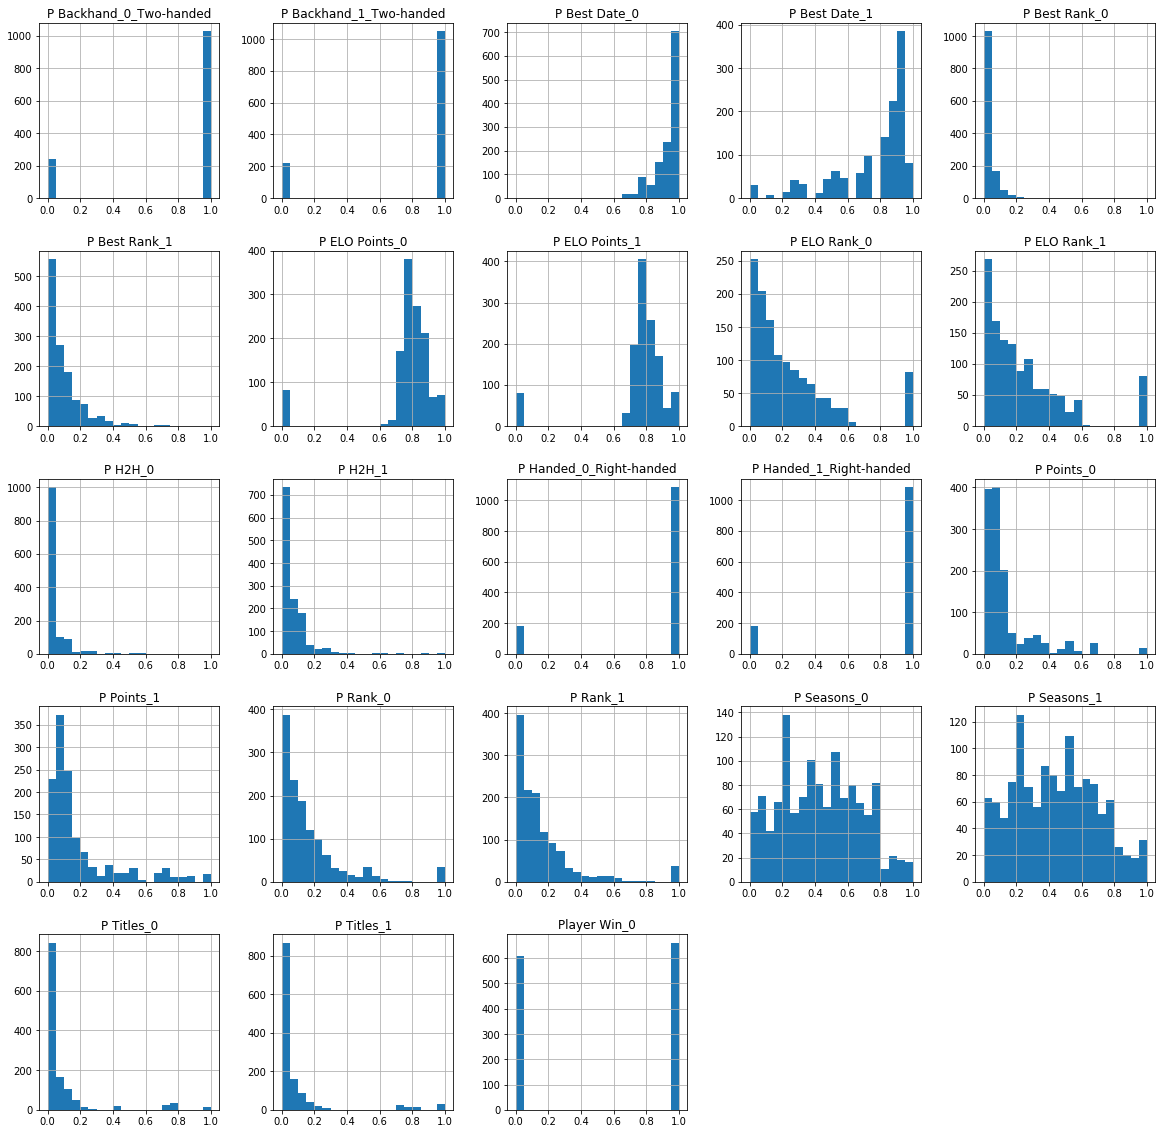

In [62]:
col_list = df_clean.columns
col_list = [e for e in col_list if "Surface" not in e]

display(col_list)

df_clean[col_list].hist(bins=20, figsize=(20,20))
plt.show()

## 7. Run Random Forest and Gradient Boosting Tree on CAS

### Get variables

In [80]:
cols = conn.table.columninfo(table=indata)

target = cols.ColumnInfo['Column'][39]
display(target)

inputs = list(cols.ColumnInfo['Column'][0:39])
display(inputs)

'Player Win_0'

['P Rank_0',
 'P Rank_1',
 'P Points_0',
 'P Points_1',
 'P H2H_0',
 'P H2H_1',
 'P Titles_0',
 'P Titles_1',
 'P Best Rank_0',
 'P Best Rank_1',
 'P Best Date_0',
 'P Best Date_1',
 'P ELO Rank_0',
 'P ELO Rank_1',
 'P ELO Points_0',
 'P ELO Points_1',
 'P Seasons_0',
 'P Seasons_1',
 'P Fav Surface_0_Carpet',
 'P Fav Surface_0_Clay',
 'P Fav Surface_0_Fast',
 'P Fav Surface_0_Grass',
 'P Fav Surface_0_Hard',
 'P Fav Surface_0_Non-Grass',
 'P Fav Surface_0_None',
 'P Fav Surface_0_Slow',
 'P Fav Surface_0_Soft',
 'P Fav Surface_1_Carpet',
 'P Fav Surface_1_Clay',
 'P Fav Surface_1_Fast',
 'P Fav Surface_1_Grass',
 'P Fav Surface_1_Hard',
 'P Fav Surface_1_None',
 'P Fav Surface_1_Slow',
 'P Fav Surface_1_Soft',
 'P Backhand_0_Two-handed',
 'P Backhand_1_Two-handed',
 'P Handed_0_Right-handed',
 'P Handed_1_Right-handed']

### Split the Data into Training and Validation

In [65]:
conn.loadActionSet('sampling')

conn.sampling.srs(
    table = indata,
    samppct = 70,
    seed = 13212,
    partind = True,
    output = dict(casOut = dict(name = indata, replace = True), copyVars = 'ALL')
)

NOTE: Added action set 'sampling'.
NOTE: Using SEED=13212 for sampling.


[outputSize]

 {'outputNObs': 1270.0, 'outputNVars': 41}

[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0  1270    889

[OutputCasTables]

                 casLib      Name Label  Rows  Columns  \
 0  CASUSERHDFS(edbras)  df_clean        1270       41   
 
                                             casTable  
 0  CASTable('df_clean', caslib='CASUSERHDFS(edbra...  

+ Elapsed: 0.0739s, user: 0.256s, sys: 0.653s, mem: 726mb

In [66]:
castbl['_PartInd_'].mean()

0.7

In [67]:
conn.loadActionSet('decisionTree')
actions = conn.builtins.help(actionSet = 'decisionTree')

NOTE: Added action set 'decisionTree'.
NOTE: Information for action set 'decisionTree':
NOTE:    decisionTree
NOTE:       dtreeTrain - Trains a decision tree
NOTE:       dtreeScore - Scores a table using a decision tree model
NOTE:       dtreeSplit - Splits decision tree nodes
NOTE:       dtreePrune - Prune a decision tree
NOTE:       dtreeMerge - Merges decision tree nodes
NOTE:       dtreeCode - Generates DATA step scoring code from a decision tree model
NOTE:       forestTrain - Trains a forest
NOTE:       forestScore - Scores a table using a forest model
NOTE:       forestCode - Generates DATA step scoring code from a forest model
NOTE:       gbtreeTrain - Trains a gradient boosting tree
NOTE:       gbtreeScore - Scores a table using a gradient boosting tree model
NOTE:       gbtreeCode - Generates DATA step scoring code from a gradient boosting tree model


### Run Random Forest

In [84]:
train_data = dict(name = indata, where = '_PartInd_ = 1')
val_data = dict(name = indata, where = '_PartInd_ = 0')

conn.decisionTree.forestTrain(
    table = train_data,
    target = target,
    inputs = inputs,
    nTree = 1000,
    casOut = dict(name = 'rf_model', replace = True)
)

,Descr,Value
0,Number of Trees,1000.000000
1,Number of Selected Variables (M),7.000000
2,Random Number Seed,0.000000
3,Bootstrap Percentage (%),63.212056
4,Number of Bins,20.000000
5,Number of Variables,39.000000
6,Alpha for Cost-Complexity Pruning,0.000000
7,Max Number of Tree Nodes,59.000000
8,Min Number of Tree Nodes,21.000000
9,Max Number of Branches,2.000000


### Gradient Boosting

In [85]:
conn.decisionTree.gbtreeTrain(
    table = train_data,
    target = target,
    inputs = inputs,
    nTree = 1000,
    casOut = dict(name = 'gb_model', replace = True)
)

,Descr,Value
0,Number of Trees,1000.0
1,Distribution,1.0
2,Learning Rate,0.1
3,Subsampling Rate,0.5
4,Number of Selected Variables (M),39.0
5,Number of Bins,20.0
6,Number of Variables,39.0
7,Max Number of Tree Nodes,57.0
8,Min Number of Tree Nodes,13.0
9,Max Number of Branches,2.0


### Score Models

In [86]:
#Score the random forest model
rf_score_obj = conn.decisionTree.forestScore(
    table    = val_data,
    model = "rf_model",
    casout = dict(name="rf_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the gradient boosting model
gb_score_obj = conn.decisionTree.gbtreeScore(
    table    = val_data,
    model = "gb_model",
    casout = dict(name="gb_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

In [89]:
display(rf_score_obj['ScoreInfo'])
display(gb_score_obj['ScoreInfo'])

,Descr,Value
0,Number of Observations Read,381
1,Number of Observations Used,381
2,Mean Squared Error,0.1631856925


,Descr,Value
0,Number of Observations Read,381
1,Number of Observations Used,381
2,Mean Squared Error,0.2205385806


### Assess Models

In [90]:
conn.loadActionSet('percentile')

NOTE: Added action set 'percentile'.


[actionset]

 'percentile'

+ Elapsed: 0.00905s, user: 0.037s, sys: 0.058s, mem: 5.65mb

In [94]:
# Assess the random forest model
rf_assess_obj = conn.percentile.assess(
   table = "rf_scored",
   inputs = "P_Player_Win_0",
   casout = dict(name="rf_assess",replace=True),
   response = target,
   event = "1"
)

#Assess the gradient boosting model
gb_assess_obj = conn.percentile.assess(
   table = "gb_scored",
   inputs = "P_Player_Win_0",
   casout = dict(name="gb_assess",replace=True),
   response = target,
   event = "1"
)

In [95]:
conn.table.fetch(table='rf_assess_ROC', to=5)

,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,...,_FHALF_,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_,_MiscEvent_
0,P_Player_Win_0,1,0.00,188.0,193.0,0.0,0.0,1.0,0.0,0.0,...,0.549065,1.0,0.493438,0.506562,0.660808,0.844243,0.688485,0.693397,0.345089,0.506562
1,P_Player_Win_0,1,0.01,188.0,193.0,0.0,0.0,1.0,0.0,0.0,...,0.549065,1.0,0.493438,0.506562,0.660808,0.844243,0.688485,0.693397,0.345089,0.506562
2,P_Player_Win_0,1,0.02,188.0,193.0,0.0,0.0,1.0,0.0,0.0,...,0.549065,1.0,0.493438,0.506562,0.660808,0.844243,0.688485,0.693397,0.345089,0.506562
3,P_Player_Win_0,1,0.03,188.0,193.0,0.0,0.0,1.0,0.0,0.0,...,0.549065,1.0,0.493438,0.506562,0.660808,0.844243,0.688485,0.693397,0.345089,0.506562
4,P_Player_Win_0,1,0.04,188.0,193.0,0.0,0.0,1.0,0.0,0.0,...,0.549065,1.0,0.493438,0.506562,0.660808,0.844243,0.688485,0.693397,0.345089,0.506562


In [100]:
models = ['rf','gb']
model_names = ['Random Forest','Gradient Boosting']

assess_ROC = []

for i, m_name in enumerate(models):
    assess_ROC.append(conn.CASTable(name = m_name + "_assess_ROC").to_frame())
    assess_ROC[i]['Model'] = model_names[i]
    
assess_ROC[]

[Selected Rows from Table RF_ASSESS_ROC
 
           _Column_ _Event_  _Cutoff_   _TP_   _FP_   _FN_   _TN_  \
 0   P_Player_Win_0       1      0.00  188.0  193.0    0.0    0.0   
 1   P_Player_Win_0       1      0.01  188.0  193.0    0.0    0.0   
 2   P_Player_Win_0       1      0.02  188.0  193.0    0.0    0.0   
 3   P_Player_Win_0       1      0.03  188.0  193.0    0.0    0.0   
 4   P_Player_Win_0       1      0.04  188.0  193.0    0.0    0.0   
 5   P_Player_Win_0       1      0.05  188.0  193.0    0.0    0.0   
 6   P_Player_Win_0       1      0.06  188.0  192.0    0.0    1.0   
 7   P_Player_Win_0       1      0.07  188.0  189.0    0.0    4.0   
 8   P_Player_Win_0       1      0.08  187.0  188.0    1.0    5.0   
 9   P_Player_Win_0       1      0.09  187.0  186.0    1.0    7.0   
 10  P_Player_Win_0       1      0.10  187.0  183.0    1.0   10.0   
 11  P_Player_Win_0       1      0.11  187.0  180.0    1.0   13.0   
 12  P_Player_Win_0       1      0.12  185.0  169.0    3.0   

#### Confusion Matrix

In [128]:
df_assess = pd.DataFrame()
df_assess = pd.concat([assess_ROC[0],assess_ROC[1]])

cutoff_index = round(df_assess['_Cutoff_'],2) == 0.50 

compare = df_assess[cutoff_index].reset_index(drop=True)
compare[['Model','_TP_','_FP_','_FN_','_TN_']]

,Model,_TP_,_FP_,_FN_,_TN_
0,Random Forest,146.0,51.0,42.0,142.0
1,Gradient Boosting,144.0,56.0,44.0,137.0


#### Misclassification

In [130]:
compare['Misclassification'] = 1-compare['_ACC_']
miss = compare[round(compare['_Cutoff_'],2)==0.5][['Model','Misclassification']]
miss.sort_values('Misclassification')

,Model,Misclassification
0,Random Forest,0.244094
1,Gradient Boosting,0.262467


#### ROC Curves

['Random Forest', 'Gradient Boosting']

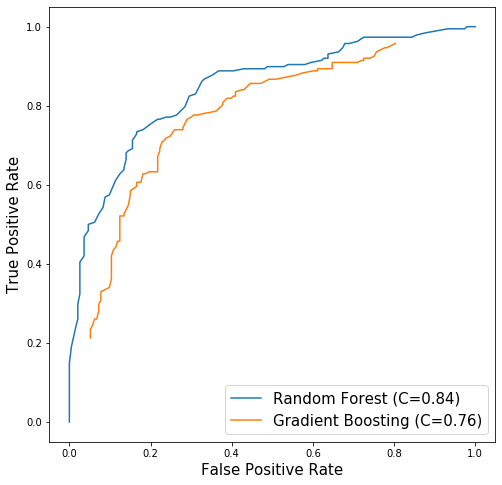

In [131]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add each curve to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_FPR_'],tmp['_Sensitivity_'], label=X+' (C=%0.2f)'%tmp['_C_'].mean())

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [133]:
conn.table.promote(caslib='casuserhdfs(edbras)', name = indata)
conn.table.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,DF_TENNIS,2540,18,0,utf-8,2019-06-19T10:40:01-04:00,2019-06-19T10:40:01-04:00,2019-06-19T11:12:28-04:00,UTF8,1.876574e+09,...,0,0,0,,,0,edbras,,2019-06-19T10:40:01-04:00,1.876574e+09
1,RF_MODEL,44782,25,0,utf-8,2019-06-19T14:30:08-04:00,2019-06-19T14:30:08-04:00,2019-06-19T14:32:45-04:00,UTF8,1.876588e+09,...,0,0,0,,,0,edbras,,,NaN
2,GB_MODEL,37536,19,0,utf-8,2019-06-19T14:30:59-04:00,2019-06-19T14:30:59-04:00,2019-06-19T14:32:46-04:00,UTF8,1.876588e+09,...,0,0,0,,,0,edbras,,,NaN
3,RF_SCORED,381,6,0,utf-8,2019-06-19T14:32:46-04:00,2019-06-19T14:32:46-04:00,2019-06-19T14:46:15-04:00,UTF8,1.876588e+09,...,0,0,0,,,0,edbras,,,NaN
4,GB_SCORED,381,3,0,utf-8,2019-06-19T14:32:46-04:00,2019-06-19T14:32:46-04:00,2019-06-19T14:46:15-04:00,UTF8,1.876588e+09,...,0,0,0,,,0,edbras,,,NaN
5,RF_ASSESS,20,21,0,utf-8,2019-06-19T14:46:15-04:00,2019-06-19T14:46:15-04:00,2019-06-19T14:46:15-04:00,UTF8,1.876589e+09,...,0,0,0,,,0,edbras,,,NaN
6,RF_ASSESS_ROC,100,21,0,utf-8,2019-06-19T14:46:15-04:00,2019-06-19T14:46:15-04:00,2019-06-19T14:55:45-04:00,UTF8,1.876589e+09,...,0,0,0,,,0,edbras,,,NaN
7,GB_ASSESS,20,21,0,utf-8,2019-06-19T14:46:15-04:00,2019-06-19T14:46:15-04:00,2019-06-19T14:46:15-04:00,UTF8,1.876589e+09,...,0,0,0,,,0,edbras,,,NaN
8,GB_ASSESS_ROC,100,21,0,utf-8,2019-06-19T14:46:15-04:00,2019-06-19T14:46:15-04:00,2019-06-19T14:55:45-04:00,UTF8,1.876589e+09,...,0,0,0,,,0,edbras,,,NaN
9,DF_CLEAN,1270,41,0,utf-8,2019-06-19T14:03:07-04:00,2019-06-19T15:56:12-04:00,2019-06-19T15:56:12-04:00,UTF8,1.876587e+09,...,1,0,0,,,0,edbras,,,NaN


In [135]:
df_clean.to_csv("df_clean.csv")